INCUBATOR START...


enter size image: 16
enter size population: 10000
enter chance crossing: 100
enter chance mutation: 0
Creating population time: 0.400 seconds

ERA #0, result:

best fitness = -25146.38671875



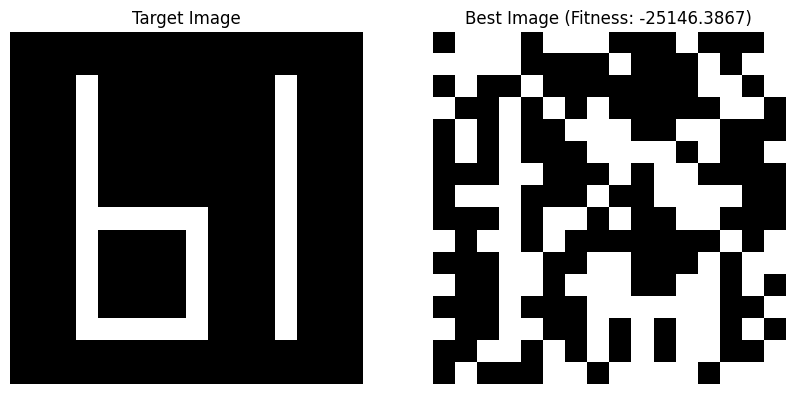

ALL_TIMES:

Calculate fitness population time: 0.230 seconds

Selecting population time: 0.027 seconds

Convert to binary population time: 0.004 seconds

Crossing population time: 0.087 seconds

Convert to image population time: 0.009 seconds

ERA #25, result:

best fitness = -0.0



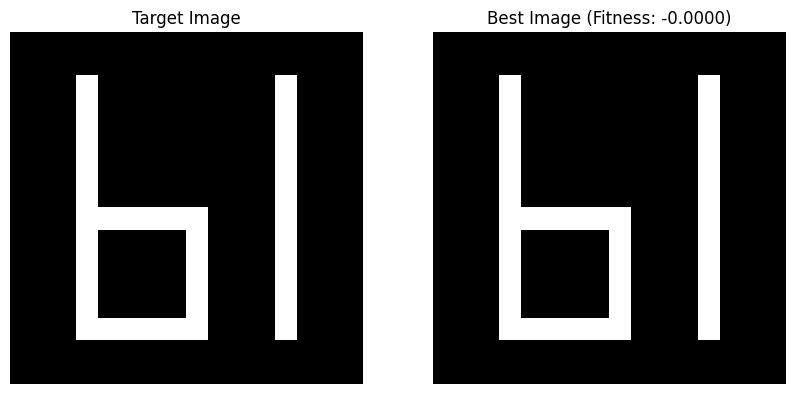

In [2]:
# @title Genetic Algorithm for generate pictures: black and white
# Genetic Algorithm for generate pictures: black and white
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import math
import time


def generate_image(height, width):
    return np.random.choice([0, 255], (height, width), p=[0.5, 0.5]).astype(np.uint8)


def create_population(height, width, size_population):
  images = []
  for _ in range(size_population):
    images.append(generate_image(height, width))
  return images


from skimage.metrics import mean_squared_error

def fitness(image, target_image):
  return -mean_squared_error(image, target_image)


def all_fitness(images, target_image):
  all_fit = []
  for image in images:
    all_fit.append(fitness(image, target_image))
  return all_fit


def Tournament_selection(population, all_fitness, n, t):
    selected_individs = []
    for _ in range(n):
        tournament = random.sample(range(len(population)), t)
        max_fitness_individ = max(tournament, key=lambda x: all_fitness[x])
        selected_individs.append(population[max_fitness_individ])
    return selected_individs


def to_binary(image):
    return bytearray(image.flatten())


def to_image(bin_code, height, width):
    array = np.array(bin_code, dtype=np.uint8).reshape((height, width))
    return array


def all_to_binary(population):
  return [to_binary(image) for image in population]


def all_to_image(population, height, width):
  return [to_image(bin_code, height, width) for bin_code in population]


def crossover(parent_1, parent_2):
  # cross = np.random.choice([1, 2], p=[0.5, 0.5])
  # if cross == 1:
  #   dot = random.randint(0, len(parent_1) - 1)
  #   return parent_1[:dot] + parent_2[dot:],parent_2[:dot] + parent_1[dot:]
  # elif cross == 2:
  point1 = random.randint(0, len(parent_1) - 1)
  point2 = random.randint(0, len(parent_1) - 1)
  if point1 > point2:
      point1, point2 = point2, point1
  child_1 = parent_1[:point1] + parent_2[point1:point2] + parent_1[point2:]
  child_2 = parent_2[:point1] + parent_1[point1:point2] + parent_2[point2:]
  return child_1, child_2


def mutation(bin_individ, chance):
  array = np.frombuffer(bin_individ, dtype=np.uint8)
  mutation_mask = np.random.rand(len(array)) < chance
  array[mutation_mask] = 255 - array[mutation_mask]
  return bytearray(array)


def crossing(population, chance_crossing, chance_mutation, size_pop):
    new_pop = []
    k = 0
    while (k < size_pop):
        i = int((random.random()) * (len(population) - 1))
        j = int((random.random()) * (len(population) - 1))
        if ((i != j) and (chance_crossing > random.random())):
            child_1, child_2 = crossover(population[i], population[j])
            new_pop.append(mutation(child_1, chance_mutation))
            new_pop.append(mutation(child_2, chance_mutation))
        else:
            new_pop.append(population[i])
            new_pop.append(population[j])
        k += 2
    return new_pop


def load_target_image(path, height, width):
    img = Image.open(path).convert('L')
    img = img.resize((width, height))
    img_array = np.array(img)
    # Convert grayscale to black and white
    img_array[img_array < 128] = 0
    img_array[img_array >= 128] = 255
    return img_array











# start pop from directory
def load_image(path):
    img = Image.open(path).convert('L')  # Convert to grayscale
    img_array = np.array(img)
    # Convert grayscale to black and white
    img_array[img_array < 128] = 0
    img_array[img_array >= 128] = 255
    return img_array


def create_population_from_directory(directory, height, width, size_population):
    images = []
    files = os.listdir(directory)
    for file in files:
        img = load_image(os.path.join(directory, file))
        img_resized = np.array(Image.fromarray(img).resize((width, height)))
        images.append(img_resized)
    while len(images) < size_population:
        images.append(generate_image(height, width))
    return images[:size_population]
# start pop from directory








# START GENETIC ALGORITHM
def INCUBATOR():
    print("INCUBATOR START...\n\n")
    width = height = int(input("enter size image: "))
    if (width <= 0) or (height <= 0):
        print("error!")
        return


    # target_image_path = input("Enter the path to the target image: ")
    target_image_path = "/content/drive/MyDrive/GeneticAlgorithm/test/size_16x16.png"
    target_image = load_target_image(target_image_path, height, width)


    size_population = int(input("enter size population: "))
    if (size_population <= 0):
        print("error!")
        return
    chance_crossing = float(input("enter chance crossing: ")) / 100
    if (not (0 <= chance_crossing <= 1)):
        print("error!")
        return
    chance_mutation = float(input("enter chance mutation: ")) / 100
    if (not (0 <= chance_mutation <= 1)):
        print("error!")
        return


    # images_directory = input("Enter the path to the directory with initial images: ")
    # images_directory = "/content/drive/MyDrive/GeneticAlgorithm/test/population"
    # start_population = create_population_from_directory(images_directory, height, width, size_population)

    start_time = time.time()
    start_population = create_population(height, width, size_population)
    end_time = time.time()
    creating_time = end_time - start_time
    print(f"Creating population time: {creating_time:.3f} seconds\n")
    np.array(start_population)
    result_population = start_population


    for era in range(100000):
        start_time = time.time()
        population_fitness = all_fitness(result_population, target_image)
        end_time = time.time()
        calculate_fitness_time = end_time - start_time

        if any(abs(fit) == 0 for fit in population_fitness):
          print(f"ERA #{era}, result:\n")
          best_fit = max(population_fitness)
          print(f"best fitness = {best_fit}\n")
          index = population_fitness.index(best_fit)
          best_image = result_population[index]

          fig, axs = plt.subplots(1, 2, figsize=(10, 5))
          axs[0].imshow(target_image, cmap='gray')
          axs[0].set_title("Target Image")
          axs[0].axis('off')
          axs[1].imshow(best_image, cmap='gray')
          axs[1].set_title(f"Best Image (Fitness: {best_fit:.4f})")
          axs[1].axis('off')
          plt.show()
          return

        # show
        if era%100 == 0:
          print(f"ERA #{era}, result:\n")
          best_fit = max(population_fitness)
          print(f"best fitness = {best_fit}\n")
          index = population_fitness.index(best_fit)
          best_image = result_population[index]

          fig, axs = plt.subplots(1, 2, figsize=(10, 5))
          axs[0].imshow(target_image, cmap='gray')
          axs[0].set_title("Target Image")
          axs[0].axis('off')
          axs[1].imshow(best_image, cmap='gray')
          axs[1].set_title(f"Best Image (Fitness: {best_fit:.4f})")
          axs[1].axis('off')
          plt.show()
        # show




        start_time = time.time()
        selected_population_for_crossover = Tournament_selection(result_population, population_fitness, int(size_population/5), 10)
        end_time = time.time()
        selecting_time = end_time - start_time

        start_time = time.time()
        binary_population_for_crossing = all_to_binary(selected_population_for_crossover)
        end_time = time.time()
        convert_to_binary_time = end_time - start_time

        start_time = time.time()
        binary_population_after_crossing = crossing(binary_population_for_crossing, chance_crossing, chance_mutation, int(size_population/2))
        end_time = time.time()
        crossing_time = end_time - start_time

        start_time = time.time()
        new_population = all_to_image(binary_population_after_crossing, height, width)
        end_time = time.time()
        convert_to_image_time = end_time - start_time

        result_population = new_population


        if era%100 == 0:
          print("ALL_TIMES:\n")
          print(f"Calculate fitness population time: {calculate_fitness_time:.3f} seconds\n")
          print(f"Selecting population time: {selecting_time:.3f} seconds\n")
          print(f"Convert to binary population time: {convert_to_binary_time:.3f} seconds\n")
          print(f"Crossing population time: {crossing_time:.3f} seconds\n")
          print(f"Convert to image population time: {convert_to_image_time:.3f} seconds\n")



INCUBATOR()

INCUBATOR START...


enter size image: 10
enter size population: 100000
enter chance crossing: 100
enter chance mutation: 0
Creating population time: 2.088 seconds

ERA #0, result:

best fitness = -15187.476666666667



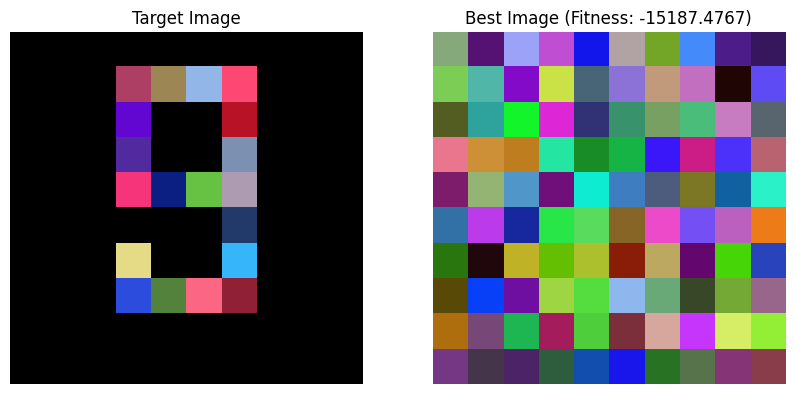

ALL_TIMES:

Calculate fitness population time: 2.608 seconds

Selecting population time: 0.127 seconds

Convert to binary population time: 0.043 seconds

Crossing population time: 1.213 seconds

Convert to image population time: 0.089 seconds

TOTAL TIME: 4.079 seconds

ERA #10, result:

best fitness = -10342.393333333333



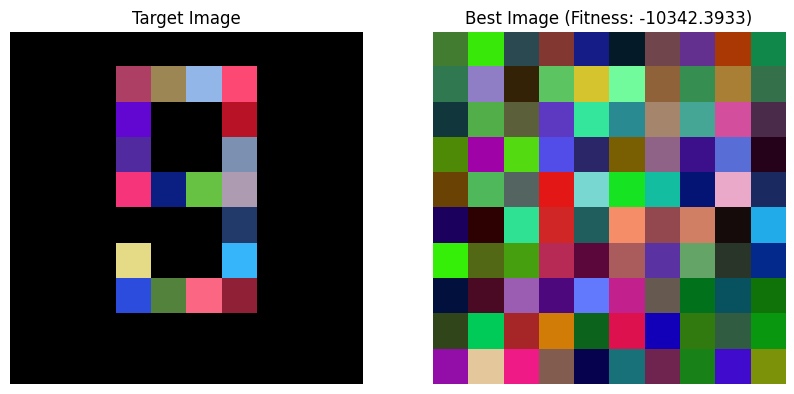

ALL_TIMES:

Calculate fitness population time: 1.191 seconds

Selecting population time: 0.134 seconds

Convert to binary population time: 0.041 seconds

Crossing population time: 1.216 seconds

Convert to image population time: 0.116 seconds

TOTAL TIME: 2.698 seconds

ERA #20, result:

best fitness = -6680.973333333333



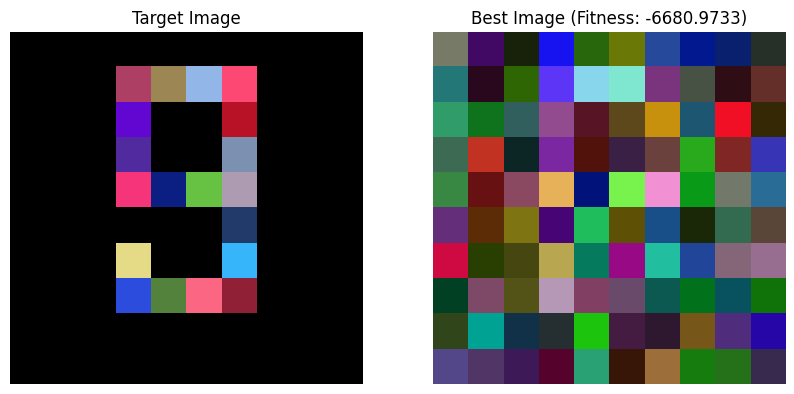

ALL_TIMES:

Calculate fitness population time: 1.121 seconds

Selecting population time: 0.131 seconds

Convert to binary population time: 0.038 seconds

Crossing population time: 1.199 seconds

Convert to image population time: 0.086 seconds

TOTAL TIME: 2.575 seconds

ERA #30, result:

best fitness = -4391.12



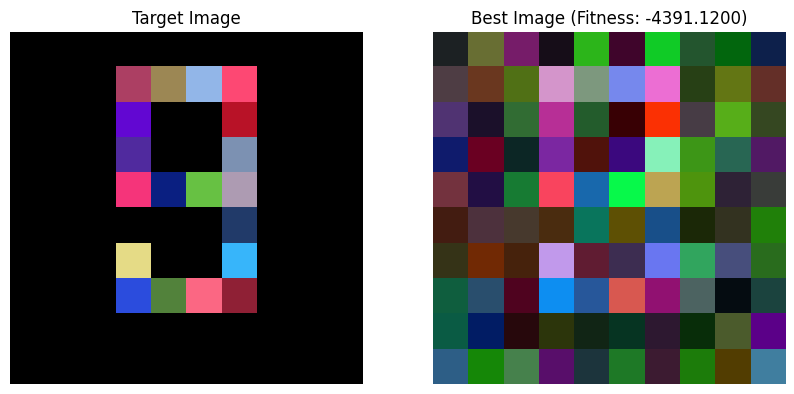

ALL_TIMES:

Calculate fitness population time: 1.110 seconds

Selecting population time: 0.130 seconds

Convert to binary population time: 0.039 seconds

Crossing population time: 1.210 seconds

Convert to image population time: 0.091 seconds

TOTAL TIME: 2.580 seconds

ERA #40, result:

best fitness = -2785.0333333333333



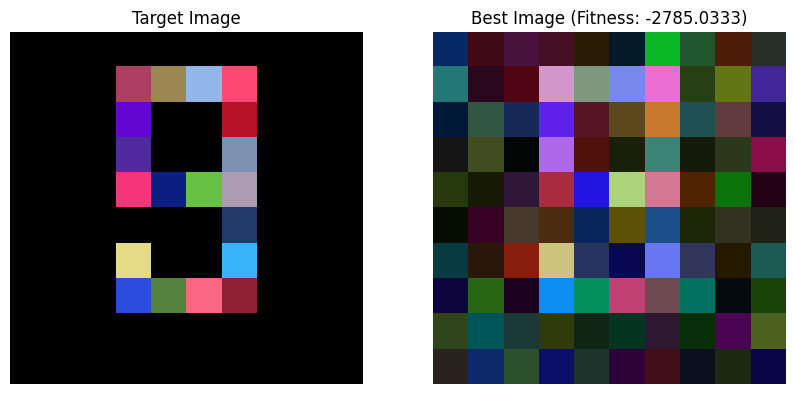

ALL_TIMES:

Calculate fitness population time: 1.090 seconds

Selecting population time: 0.127 seconds

Convert to binary population time: 0.041 seconds

Crossing population time: 1.219 seconds

Convert to image population time: 0.091 seconds

TOTAL TIME: 2.569 seconds

ERA #50, result:

best fitness = -1851.7833333333333



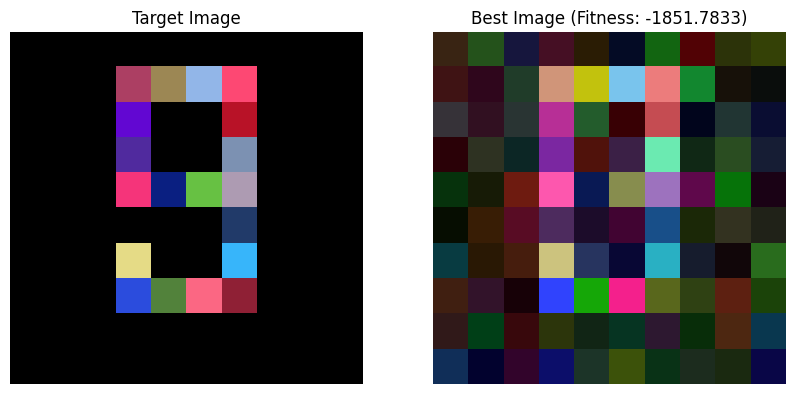

ALL_TIMES:

Calculate fitness population time: 1.140 seconds

Selecting population time: 0.146 seconds

Convert to binary population time: 0.042 seconds

Crossing population time: 1.194 seconds

Convert to image population time: 0.111 seconds

TOTAL TIME: 2.633 seconds

ERA #60, result:

best fitness = -1308.6333333333334



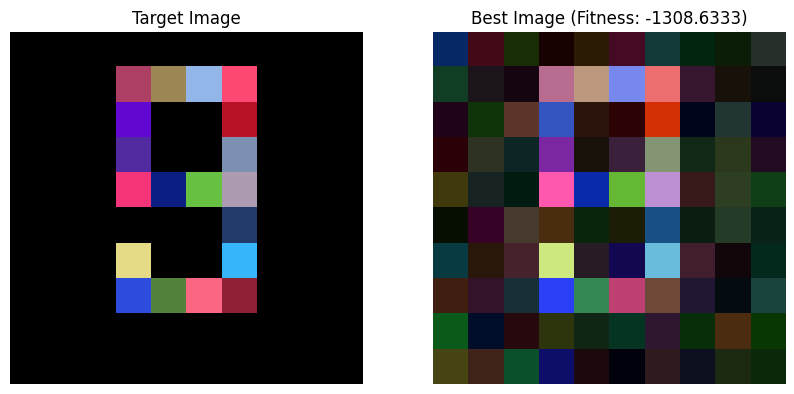

ALL_TIMES:

Calculate fitness population time: 1.227 seconds

Selecting population time: 0.132 seconds

Convert to binary population time: 0.040 seconds

Crossing population time: 1.214 seconds

Convert to image population time: 0.098 seconds

TOTAL TIME: 2.710 seconds

ERA #70, result:

best fitness = -956.7666666666667



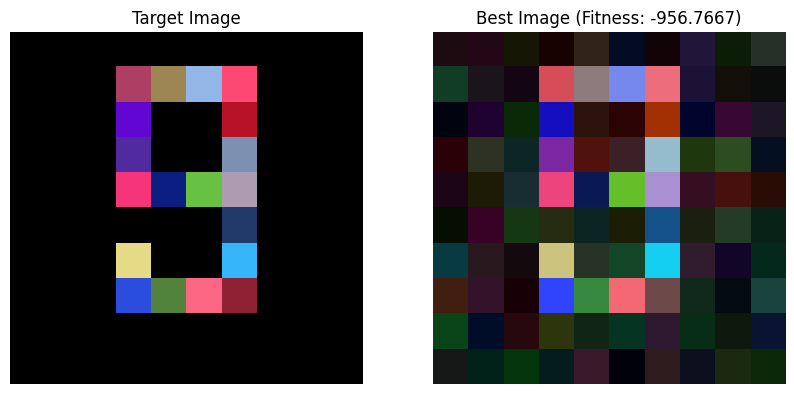

ALL_TIMES:

Calculate fitness population time: 1.060 seconds

Selecting population time: 0.134 seconds

Convert to binary population time: 0.046 seconds

Crossing population time: 1.494 seconds

Convert to image population time: 0.171 seconds

TOTAL TIME: 2.905 seconds

ERA #80, result:

best fitness = -696.69



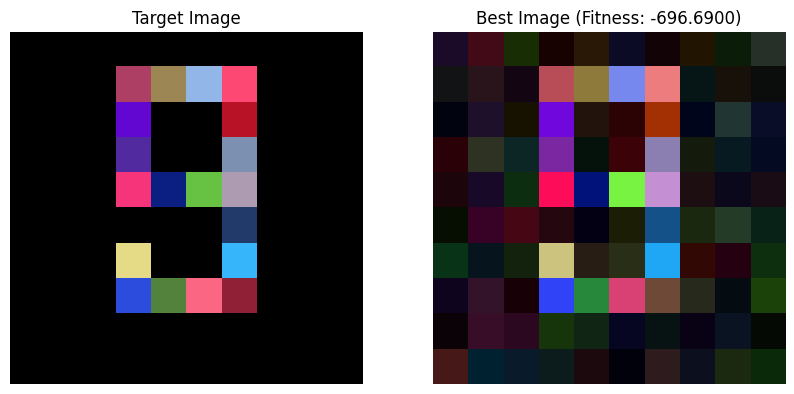

ALL_TIMES:

Calculate fitness population time: 1.301 seconds

Selecting population time: 0.228 seconds

Convert to binary population time: 0.076 seconds

Crossing population time: 1.748 seconds

Convert to image population time: 0.167 seconds

TOTAL TIME: 3.519 seconds

ERA #90, result:

best fitness = -505.51



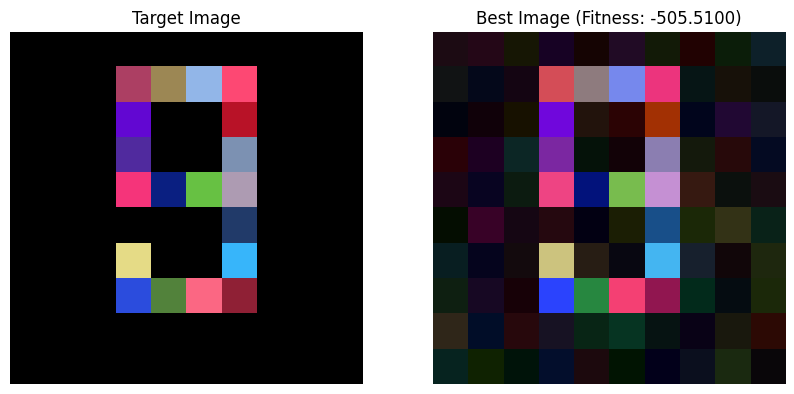

ALL_TIMES:

Calculate fitness population time: 1.650 seconds

Selecting population time: 0.219 seconds

Convert to binary population time: 0.063 seconds

Crossing population time: 1.686 seconds

Convert to image population time: 0.101 seconds

TOTAL TIME: 3.720 seconds

ERA #100, result:

best fitness = -384.78



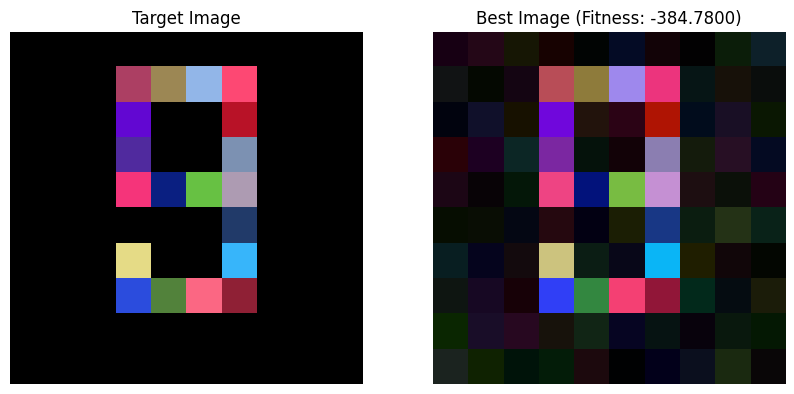

ALL_TIMES:

Calculate fitness population time: 1.764 seconds

Selecting population time: 0.224 seconds

Convert to binary population time: 0.071 seconds

Crossing population time: 1.751 seconds

Convert to image population time: 0.165 seconds

TOTAL TIME: 3.974 seconds

ERA #110, result:

best fitness = -297.51666666666665



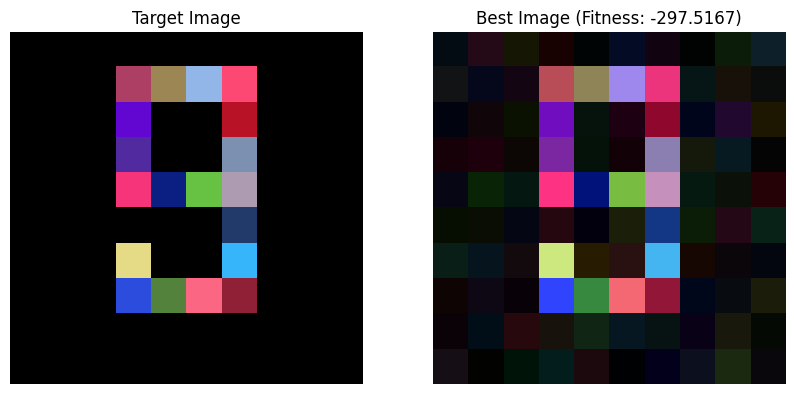

In [10]:
# @title Genetic Algorithm for generate pictures: multicolor
# Genetic Algorithm for generate pictures: multicolor
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import math
import time
from skimage.metrics import mean_squared_error


def generate_image(height, width):
    return np.random.randint(0, 256, (height, width, 3)).astype(np.uint8)


def create_population(height, width, size_population):
  images = []
  for _ in range(size_population):
    images.append(generate_image(height, width))
  return images


def fitness(image, target_image):
  return -mean_squared_error(image, target_image)


def all_fitness(images, target_image):
  all_fit = []
  for image in images:
    all_fit.append(fitness(image, target_image))
  return all_fit


def Tournament_selection(population, all_fitness, n, t):
    selected_individs = []
    for _ in range(n):
        tournament = random.sample(range(len(population)), t)
        max_fitness_individ = max(tournament, key=lambda x: all_fitness[x])
        selected_individs.append(population[max_fitness_individ])
    return selected_individs


def to_binary(image):
    return bytearray(image.flatten())


def to_image(bin_code, height, width):
    array = np.array(bin_code, dtype=np.uint8).reshape((height, width, 3))
    return array


def all_to_binary(population):
  return [to_binary(image) for image in population]


def all_to_image(population, height, width):
  return [to_image(bin_code, height, width) for bin_code in population]


def crossover(parent_1, parent_2):
  # cross = np.random.choice([1, 2], p=[0.5, 0.5])
  # if cross == 1:
  #   dot = random.randint(0, len(parent_1) - 1)
  #   return parent_1[:dot] + parent_2[dot:],parent_2[:dot] + parent_1[dot:]
  # elif cross == 2:
  point1 = random.randint(0, len(parent_1) - 1)
  point2 = random.randint(0, len(parent_1) - 1)
  if point1 > point2:
      point1, point2 = point2, point1
  child_1 = parent_1[:point1] + parent_2[point1:point2] + parent_1[point2:]
  child_2 = parent_2[:point1] + parent_1[point1:point2] + parent_2[point2:]
  return child_1, child_2


def mutation(bin_individ, chance):
  array = np.frombuffer(bin_individ, dtype=np.uint8)
  mutation_mask = np.random.rand(len(array)) < chance
  array[mutation_mask] = np.random.randint(0, 256, size=np.count_nonzero(mutation_mask))
  return bytearray(array)


def crossing(population, chance_crossing, chance_mutation, size_pop):
    new_pop = []
    k = 0
    while (k < size_pop):
        i = int((random.random()) * (len(population) - 1))
        j = int((random.random()) * (len(population) - 1))
        if ((i != j) and (chance_crossing > random.random())):
            child_1, child_2 = crossover(population[i], population[j])
            new_pop.append(mutation(child_1, chance_mutation))
            new_pop.append(mutation(child_2, chance_mutation))
        else:
            new_pop.append(population[i])
            new_pop.append(population[j])
        k += 2
    return new_pop


def load_target_image(path, height, width):
    img = Image.open(path).convert('RGB')
    img = img.resize((width, height))
    img_array = np.array(img)
    return img_array











# start pop from directory
def load_image(path):
    img = Image.open(path).convert('RGB')  # Convert to grayscale
    img_array = np.array(img)
    return img_array


def create_population_from_directory(directory, height, width, size_population):
    images = []
    files = os.listdir(directory)
    for file in files:
        img = load_image(os.path.join(directory, file))
        img_resized = np.array(Image.fromarray(img).resize((width, height)))
        images.append(img_resized)
    while len(images) < size_population:
        images.append(generate_image(height, width))
    return images[:size_population]
# start pop from directory








# START GENETIC ALGORITHM
def INCUBATOR():
    print("INCUBATOR START...\n\n")
    width = height = int(input("enter size image: "))
    if (width <= 0) or (height <= 0):
        print("error!")
        return


    # target_image_path = input("Enter the path to the target image: ")
    target_image_path = "/content/drive/MyDrive/GeneticAlgorithm/test/size_10x10.png"
    target_image = load_target_image(target_image_path, height, width)


    # Coloring Target Image
    for i in range(target_image.shape[0]):
      for j in range(target_image.shape[1]):
        if np.array_equal(target_image[i, j], [255, 255, 255]):
          target_image[i, j] = np.random.randint(0, 256, 3).astype(np.uint8)
    # Coloring Target Image



    size_population = int(input("enter size population: "))
    if (size_population <= 0):
        print("error!")
        return
    chance_crossing = float(input("enter chance crossing: ")) / 100
    if (not (0 <= chance_crossing <= 1)):
        print("error!")
        return
    chance_mutation = float(input("enter chance mutation: ")) / 100
    if (not (0 <= chance_mutation <= 1)):
        print("error!")
        return


    # images_directory = input("Enter the path to the directory with initial images: ")
    # images_directory = "/content/drive/MyDrive/GeneticAlgorithm/test/population"
    # start_population = create_population_from_directory(images_directory, height, width, size_population)

    start_time = time.time()
    start_population = create_population(height, width, size_population)
    end_time = time.time()
    creating_time = end_time - start_time
    print(f"Creating population time: {creating_time:.3f} seconds\n")
    np.array(start_population)
    result_population = start_population


    for era in range(100000):
        start_time = time.time()
        population_fitness = all_fitness(result_population, target_image)
        end_time = time.time()
        calculate_fitness_time = end_time - start_time

        if any(abs(fit) <= 300 for fit in population_fitness):
          print(f"ERA #{era}, result:\n")
          best_fit = max(population_fitness)
          print(f"best fitness = {best_fit}\n")
          index = population_fitness.index(best_fit)
          best_image = result_population[index]

          fig, axs = plt.subplots(1, 2, figsize=(10, 5))
          axs[0].imshow(target_image)
          axs[0].set_title("Target Image")
          axs[0].axis('off')
          axs[1].imshow(best_image)
          axs[1].set_title(f"Best Image (Fitness: {best_fit:.4f})")
          axs[1].axis('off')
          plt.show()
          return

        # show
        if era%10 == 0:
          print(f"ERA #{era}, result:\n")
          best_fit = max(population_fitness)
          print(f"best fitness = {best_fit}\n")
          index = population_fitness.index(best_fit)
          best_image = result_population[index]

          fig, axs = plt.subplots(1, 2, figsize=(10, 5))
          axs[0].imshow(target_image)
          axs[0].set_title("Target Image")
          axs[0].axis('off')
          axs[1].imshow(best_image)
          axs[1].set_title(f"Best Image (Fitness: {best_fit:.4f})")
          axs[1].axis('off')
          plt.show()
        # show




        start_time = time.time()
        selected_population_for_crossover = Tournament_selection(result_population, population_fitness, int(size_population/5), 3)
        end_time = time.time()
        selecting_time = end_time - start_time

        start_time = time.time()
        binary_population_for_crossing = all_to_binary(selected_population_for_crossover)
        end_time = time.time()
        convert_to_binary_time = end_time - start_time

        start_time = time.time()
        binary_population_after_crossing = crossing(binary_population_for_crossing, chance_crossing, chance_mutation, int(size_population/2))
        end_time = time.time()
        crossing_time = end_time - start_time

        start_time = time.time()
        new_population = all_to_image(binary_population_after_crossing, height, width)
        end_time = time.time()
        convert_to_image_time = end_time - start_time

        result_population = new_population


        if era%10 == 0:
          print("ALL_TIMES:\n")
          print(f"Calculate fitness population time: {calculate_fitness_time:.3f} seconds\n")
          print(f"Selecting population time: {selecting_time:.3f} seconds\n")
          print(f"Convert to binary population time: {convert_to_binary_time:.3f} seconds\n")
          print(f"Crossing population time: {crossing_time:.3f} seconds\n")
          print(f"Convert to image population time: {convert_to_image_time:.3f} seconds\n")
          print(f"TOTAL TIME: {(calculate_fitness_time + selecting_time + convert_to_binary_time + crossing_time + convert_to_image_time):.3f} seconds\n")



INCUBATOR()